In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ablation-results.csv')

In [3]:
def compute_importance(dff):
    data = dff.values[..., 2:].astype(float)
    x = data[..., :-1]
    y = data[..., -1]
    
    rf = RandomForestRegressor()
    rf.fit(x, y)
    result = permutation_importance(
        rf, x, y, n_repeats=100, random_state=42, n_jobs=2
    )
    
    res_df = pd.DataFrame()
    res_df['Importance'] = result.importances_mean
    res_df['Feature'] = list(dff.columns)[2:-1]
    res_df['Err'] = result.importances_std
    
    ax = sns.barplot(data=res_df, x='Feature', y='Importance')
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=res_df["Err"], fmt="none", c="k")
    plt.show()

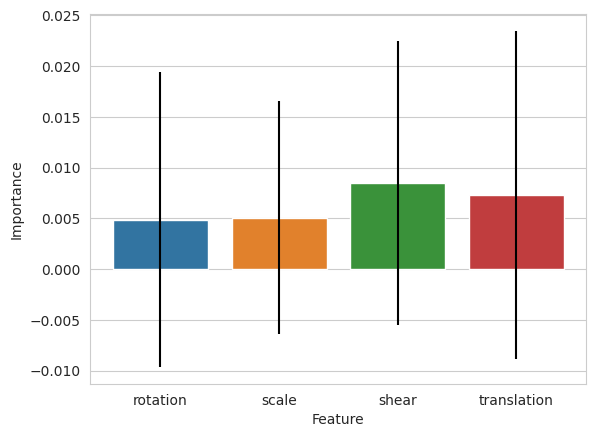

In [9]:
compute_importance(df)

In [5]:
df.query('rotation & ~scale & ~shear & ~translation & model == "simclr-affine"')['accuracy'].mean()

0.3122981848184818

In [6]:
df.query('~rotation & scale & ~shear & ~translation & model == "simclr-affine"')['accuracy'].mean()

0.31975533553355334

In [7]:
df.query('~rotation & ~scale & shear & ~translation & model == "simclr-affine"')['accuracy'].mean()

0.32223036303630365

In [8]:
df.query('~rotation & ~scale & ~shear & translation & model == "simclr-affine"')['accuracy'].mean()

0.31000572057205716